In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

What you've done:

ps. 서비스 가입한 기간 월의 정규분포
1. 구독 해지/유지 비율 (Target의 비율)

2. 선호하는 난이도, 구독 유형(범주형 데이터)의 건수 
    Low 데이터가 가장 많고, Basic 구독자가 가장 많음

3. 선호하는 난이도에 따른 다음달 구독 유지 비율 
    결론 2가지를 이끌어 낼 수 있었다.
    
    1. 선호하는 난이도가 Low인 사람들이 구독 유지도 많았다. 
    
        그렇다면, **Low를 택한 사람들과 구독 유지와 상관이 있는가**?

    2. Imbalance (선호하는 난이도 Low를 택한 사람이 가장 많았고, 그 다음이 Medium, 마지막이 High)

4. - High에서 구독을 한 사람들 비율(Percentage): 62.1 %
   - Medium에서 구독을 한 사람들 비율(Percentage): 63.5 %
   - Low에서 구독을 한 사람들 비율(Percentage): 61.0 %
   - high에서 구독을 안 한 사람들 비율 (Percentage): 38.0 %
   - Medium에서 구독을 안 한 사람들 비율 (Percentage): 36.5 % 
   - Low에서 구독을 안 한 사람들 비율 (Percentage): 39.0 %
   
    위의 가설 LOW를 택한 사람은 구독 유지와 상관이 있는가?에 대해 간접적으로 확인해본다면,
    medium high 에서도 62.1 퍼센트로 10명중 6명은 구독을 하겠다라고 판단할 수 있다.

    단순히 Low에서 구독 유지의 비율이 많았으니까, low인 사람들은 구독을 할 것이다라는 판단을 하기에는 부족한 근거라고 볼 수 있다.

5. subscription_type에서도 비슷한 결과를 가져왔다.
   구독 유형 별 target 구독 유지는 크게 의미 없는 결과를 낳았다고 판단했다.
   Basic 사람들 중 61.6 % 비율 만큼 다음 달 구독 신청했고, Premium 사람들 중 62.6 % 만큼 다음 달 구독을 신청하였다.
   Basic을 신청하였다고해서 다음달 구독을 할 것이라는 관계는 없다고 볼 수 있다.

6. Paypatter에 따른 어떠한 상관 관계가 있는지 파악해봐야겠다.
   

In [2]:
df=pd.read_csv(r'C:\Users\hyssk\AICE_\Dacon_DataAnlysis\train.csv')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
'''
column,description
user_id,사용자의 고유 식별자
subscription_duration,사용자가 서비스에 가입한 기간 (월)
recent_login_time,사용자가 마지막으로 로그인한 시간 (일)
average_login_time,사용자의 일반적인 로그인 시간
average_time_per_learning_session,각 학습 세션에 소요된 평균 시간 (분)
monthly_active_learning_days,월간 활동적인 학습 일수
total_completed_courses,완료한 총 코스 수
recent_learning_achievement,최근 학습 성취도
abandoned_learning_sessions,중단된 학습 세션 수
community_engagement_level,커뮤니티 참여도
preferred_difficulty_level,선호하는 난이도
subscription_type,구독 유형
customer_inquiry_history,고객 문의 이력
payment_pattern,"
    사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
    - 7: 3개월 모두 결제함
    - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
    - 5: 첫 달과 마지막 달에 결제함
    - 4: 첫 달에만 결제함
    - 3: 마지막 2개월에 결제함
    - 2: 가운데 달에만 결제함
    - 1: 마지막 달에만 결제함
    - 0: 3개월 동안 결제하지 않음
    "
target,사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냅니다.
'''

'\ncolumn,description\nuser_id,사용자의 고유 식별자\nsubscription_duration,사용자가 서비스에 가입한 기간 (월)\nrecent_login_time,사용자가 마지막으로 로그인한 시간 (일)\naverage_login_time,사용자의 일반적인 로그인 시간\naverage_time_per_learning_session,각 학습 세션에 소요된 평균 시간 (분)\nmonthly_active_learning_days,월간 활동적인 학습 일수\ntotal_completed_courses,완료한 총 코스 수\nrecent_learning_achievement,최근 학습 성취도\nabandoned_learning_sessions,중단된 학습 세션 수\ncommunity_engagement_level,커뮤니티 참여도\npreferred_difficulty_level,선호하는 난이도\nsubscription_type,구독 유형\ncustomer_inquiry_history,고객 문의 이력\npayment_pattern,"\n    사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.\n    - 7: 3개월 모두 결제함\n    - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음\n    - 5: 첫 달과 마지막 달에 결제함\n    - 4: 첫 달에만 결제함\n    - 3: 마지막 2개월에 결제함\n    - 2: 가운데 달에만 결제함\n    - 1: 마지막 달에만 결제함\n    - 0: 3개월 동안 결제하지 않음\n    "\ntarget,사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냅니다.\n'

In [4]:
df.drop(['user_id'],axis=1,inplace=True) # column (가중치가 필요없는 열 삭제)
df # user_id의 칼럼 삭제

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   subscription_duration              10000 non-null  int64  
 1   recent_login_time                  10000 non-null  int64  
 2   average_login_time                 10000 non-null  float64
 3   average_time_per_learning_session  10000 non-null  float64
 4   monthly_active_learning_days       10000 non-null  int64  
 5   total_completed_courses            10000 non-null  int64  
 6   recent_learning_achievement        10000 non-null  float64
 7   abandoned_learning_sessions        10000 non-null  int64  
 8   community_engagement_level         10000 non-null  int64  
 9   preferred_difficulty_level         10000 non-null  object 
 10  subscription_type                  10000 non-null  object 
 11  customer_inquiry_history           10000 non-null  int6

데이터 내부에 NaN 값이 존재하지 않는다. 결측치에 대한 처리는 하지 않아도 된다.

object는 preferred_difficulty_level, subscription_type 두 칼럼이다. 두 칼럼을 컴퓨터가 이해할 수 있는 숫자 형태로 바꾸어야함.

In [6]:
df.describe() # 수치형 데이터에 대한 요약 통계

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,10.000000,7.000000,1.000000


사용자가 서비스에 가입한 기간의 평균 (월기간)은 11.8 개월, 표준 편차는 6.6, min는 1.0월

In [7]:
# subscription_duration의 정규 분포
subscripition_duration_mean = df['subscription_duration'].mean()
subscripition_duration_std = df['subscription_duration'].std()
Z=(df['subscription_duration']-subscripition_duration_mean)/subscripition_duration_std
Z

0       0.167038
1       0.621522
2       1.530489
3      -1.650897
4      -1.196413
          ...   
9995    1.530489
9996   -0.287446
9997   -0.741930
9998   -0.135951
9999   -0.287446
Name: subscription_duration, Length: 10000, dtype: float64

Text(0.5, 1.0, '서비스 가입한 기간 월의 정규분포')

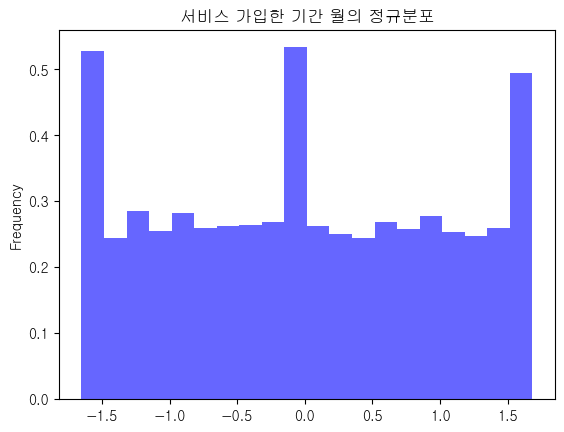

In [32]:
Z.plot(kind='hist', bins=20, density=True, alpha=0.6, color='blue')
plt.title("서비스 가입한 기간 월의 정규분포")

본인의 통계적 지식이 부족하여 subscription_duration의 정규 분포 그래프가 다음과 같이 나오는지 장담은 못하겠다.

나름 학부생때의 통계를 배웠던 기억을 되살려보자면, 평균에 가까운 점수들이 압도적으로 많고 즉, 평균(11.89 개월) 서비스 가입기간이 12개월에 가까운 사람들이 압도적으로 높고, 그래프의 끝이 높은 걸로 보아, 서비스가입 기간의 min, max에 있는 사람들이 압도적으로 많다고 볼 수 있다.

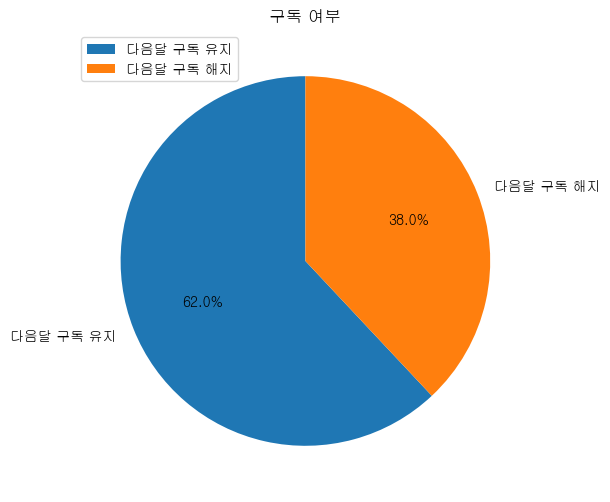

In [33]:
target_value_count=df['target'].value_counts()
plt.figure(figsize=(12,6))
plt.pie(target_value_count,labels=['다음달 구독 유지','다음달 구독 해지'],autopct='%.1f%%',startangle=90)
plt.title("구독 여부 비율")
plt.legend()
plt.show()

그럼 어떤 칼럼이 사람들을 구독하게 했는지, 구독하지 않게 하였는지 파악해야한다.

어떤 칼럼이 Target에 대해 영향을 끼치지 않는지 파악 해야한다.

또한 각 칼럼마다의 이상치 탐지도 필요

In [10]:
df.describe(include='all')

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,Basic,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4992,5979,NaN,NaN,NaN
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,NaN,NaN,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,NaN,NaN,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,NaN,NaN,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,NaN,NaN,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,NaN,NaN,3.000000,6.000000,1.000000


In [11]:
df['subscription_type'].value_counts()

Basic      5979
Premium    4021
Name: subscription_type, dtype: int64

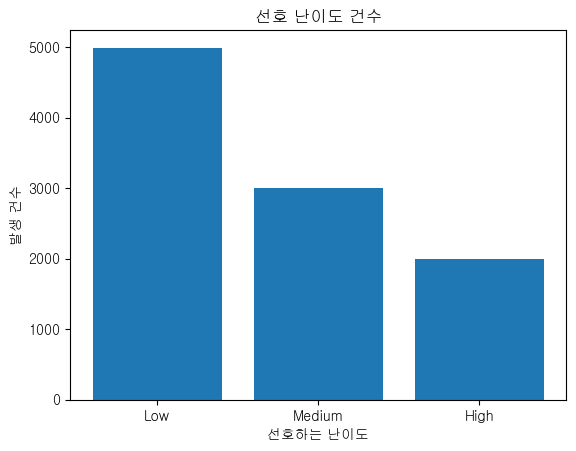

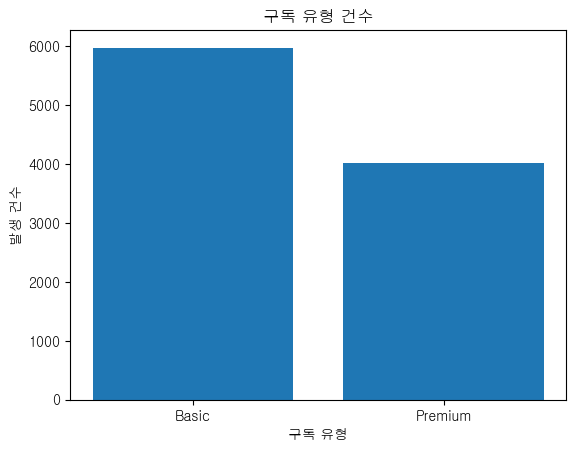

In [35]:
preferred_difficulty_level_value_counts=df['preferred_difficulty_level'].value_counts() # '어떤 코스에 대한 선호하는 난이도 중 가장 많이 선호하는 것은 Low'
subscription_type_value_counts=df['subscription_type'].value_counts() # 구독 유형

plt.figure()
plt.bar(x=preferred_difficulty_level_value_counts.index,height=preferred_difficulty_level_value_counts)
plt.xlabel('선호하는 난이도')
plt.ylabel('발생 건수')
plt.title("선호 난이도 건수")
plt.show()

plt.figure()
plt.bar(x=subscription_type_value_counts.index,height=subscription_type_value_counts)
plt.xlabel('구독 유형')
plt.ylabel('발생 건수')
plt.title("구독 유형 건수")
plt.show()

그러면 선호하는 난이도 레벨에 따른 다음달 구독 여부(target) 를 알아보고 싶다.

Low 레벨을 선호했던 사람들의 구독 여부 
Medium 레벨을 선호했던 사람들의 구독 여부
High 레벨을 선호했던 사람들의 구독 여부 

또는 

구독 유형에 따른 다음달 구독 여부(target)를 알아 보고 싶다.

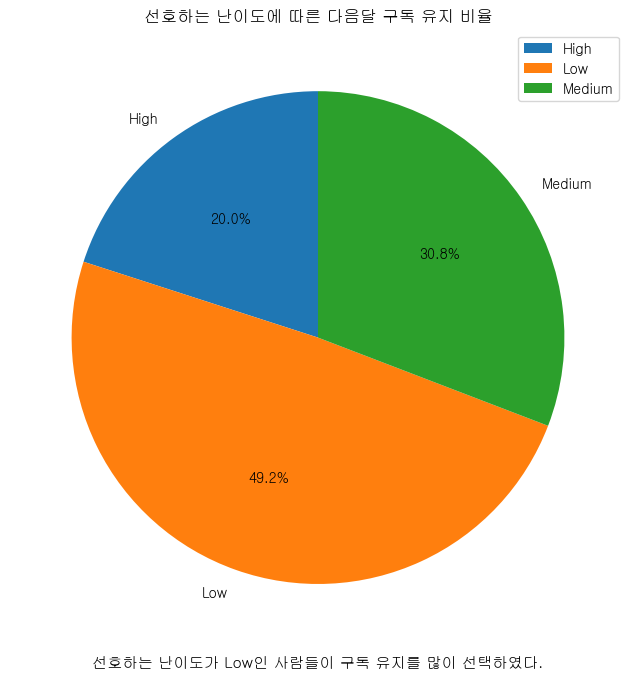

In [36]:
data=df.groupby(['preferred_difficulty_level']).sum().loc[["High",'Low','Medium'],'target'] # 사람들의 선호하는 난이도에 따른 구독한 사람들 비율
plt.figure(figsize=(10,8))
plt.pie(x=data,labels=data.index,startangle=90,autopct='%.1f%%')
plt.title("선호하는 난이도에 따른 다음달 구독 유지 비율")
plt.xlabel("선호하는 난이도가 Low인 사람들이 구독 유지를 많이 선택하였다.",fontsize=11)
plt.legend()
plt.show()

In [14]:
df['target'].value_counts()

1    6199
0    3801
Name: target, dtype: int64

In [15]:
data=df.groupby("preferred_difficulty_level").count()
data
# count: {High: Target=2000, Medium: Target=3008, Low: 4992} target에 대한 비율

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,subscription_type,customer_inquiry_history,payment_pattern,target
preferred_difficulty_level,,,,,,,,,,,,,
High,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
Low,4992,4992,4992,4992,4992,4992,4992,4992,4992,4992,4992,4992,4992
Medium,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008


In [16]:
data=df.groupby("preferred_difficulty_level").sum() # 1을 선택한 (구독을 신청한 사람들의 수)
data
# High: 1241, Low: 3047, Medium:1911 # 구독을 하겠다고 한 고객의 비율


,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,customer_inquiry_history,payment_pattern,target
preferred_difficulty_level,,,,,,,,,,,,
High,23521,30326,29772.382483,96722.043254,24738,22404,150213.777787,5939,7158,4116,7130,1241
Low,59991,74667,74840.093659,299002.931609,62976,66251,375086.544450,15370,20927,9988,17269,3047
Medium,35462,45139,45328.288365,153452.229698,37740,33620,224994.804992,9127,10776,6001,10630,1911


Percentage Of high: 62.1 % | Percentage Of medium: 63.5 % | Percentage Of low: 61.0 %
Percentage Of Non-high: 38.0 % | Percentage Of Non-medium: 36.5 % | Percentage Of Non-low: 39.0 %


Text(0.5, 1.0, 'Percentage of Subscription by each column')

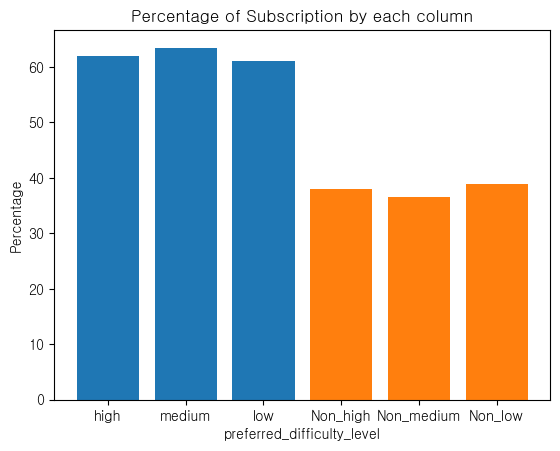

In [17]:
# High에서 구독을 한 사람들 비율(Percentage)
high=(1241/2000)*100
# Medium에서 구독을 한 사람들 비율(Percentage)
medium=(1911/3008)*100
# Low에서 구독을 한 사람들 비율(Percentage)
low=(3047/4992)*100
# high에서 구독을 안 한 사람들 비율 (Percentage)
Non_high=((2000-1241)/2000)*100
# Medium에서 구독을 안 한 사람들 비율 (Percentage)
Non_medium=((3008-1911)/3008)*100
# Low에서 구독을 안 한 사람들 비율 (Percentage)
Non_low=((4992-3047)/4992)*100
from matplotlib import font_manager, rc
font_path = "c:\WINDOWS\Fonts\GULIM.TTC"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
print(f"Percentage Of high: {high:.1f} % | Percentage Of medium: {medium:.1f} % | Percentage Of low: {low:.1f} %")
print(f'Percentage Of Non-high: {Non_high:.1f} % | Percentage Of Non-medium: {Non_medium:.1f} % | Percentage Of Non-low: {Non_low:.1f} %')
plt.figure()
plt.bar(x=['high','medium','low'],height=[high,medium,low])
plt.bar(x=['Non_high','Non_medium','Non_low'],height=[Non_high,Non_medium,Non_low])
plt.xlabel("preferred_difficulty_level")
plt.ylabel("Percentage")
plt.title("Percentage of Subscription by each column")

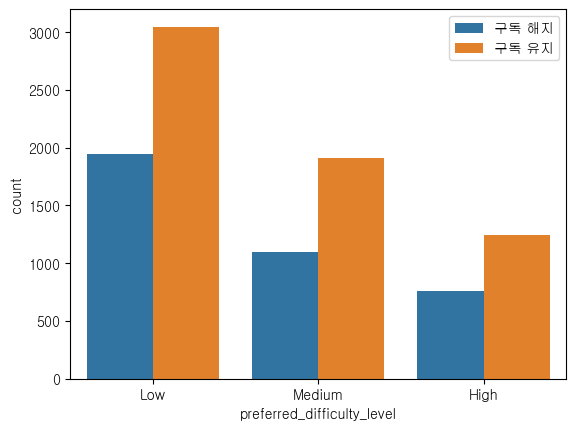

In [41]:
sns.countplot(data=df, x='preferred_difficulty_level',hue='target')
plt.legend(labels=['구독 해지','구독 유지'])
plt.show()

In [19]:
df['target'].value_counts()

1    6199
0    3801
Name: target, dtype: int64

In [20]:
data=df.groupby('subscription_type').count().loc[['Basic','Premium'],'target'] # Basic, Premium 비율: Basic:5979, Premium: 4021
data

subscription_type
Basic      5979
Premium    4021
Name: target, dtype: int64

In [21]:
data=df.groupby("subscription_type").sum().loc[['Basic','Premium'],'target'] # Basic 사람들 중 3683명이 다음 달 구독, Premium 사람들 중 2516명이 다음 달 구독을 선택
data

subscription_type
Basic      3683
Premium    2516
Name: target, dtype: int64

Basic 사람들 중 61.6 % 비율 만큼 다음 달 구독 신청 | Premium 사람들 중 62.6 % 만큼 다음 달 구독을 신청


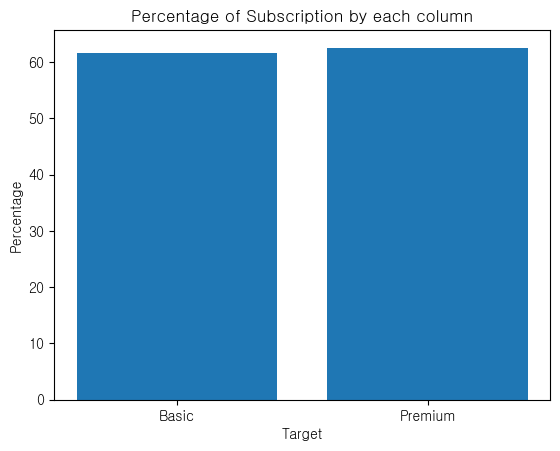

In [22]:
Basic=(3683/5979)*100
Premium=(2516/4021)*100
print(f"Basic 사람들 중 {Basic:.1f} % 비율 만큼 다음 달 구독 신청 | Premium 사람들 중 {Premium:.1f} % 만큼 다음 달 구독을 신청")
plt.figure()
plt.bar(data.index,height=[Basic,Premium])
plt.ylabel("Percentage")
plt.xlabel("Target")
plt.title("Percentage of Subscription by each column")
plt.show()

payment_pattern: 사용자의 지난 3개월 간의 결제 패턴
에 따른 target 분석

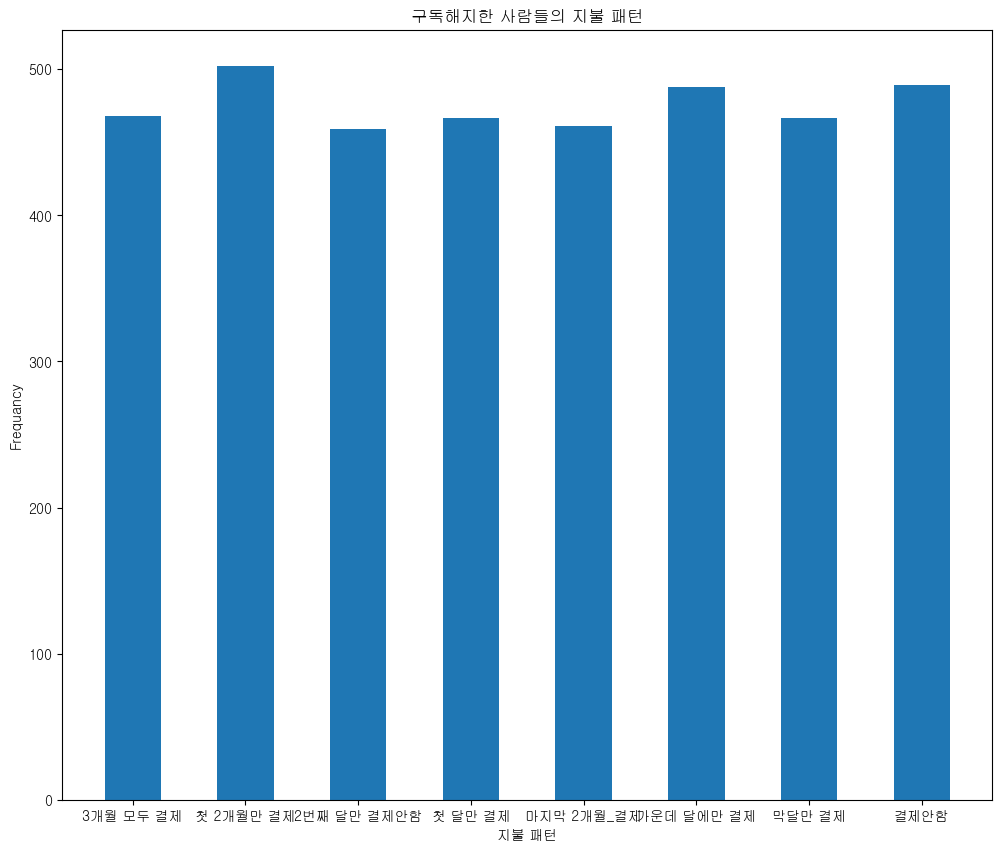

In [23]:
df.groupby("payment_pattern").count()
df_target_0=df[df['target']==0]
data=df_target_0.groupby("payment_pattern").count().loc[[0,1,2,3,4,5,6,7],'target']
data
plt.figure(figsize=(12,10))
plt.bar(x=['3개월 모두 결제','첫 2개월만 결제','2번째 달만 결제안함','첫 달만 결제','마지막 2개월_결제','가운데 달에만 결제','막달만 결제','결제안함'],height=data,width=0.5)
plt.xlabel('지불 패턴')
plt.ylabel("Frequancy")
plt.title("구독해지한 사람들의 지불 패턴")
plt.show()

In [39]:
df_target_1=df[df['target']==1]
df_target_1

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
6,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,11,6,11.187836,88.757610,6,9,77.335911,5,4,High,Basic,1,4,1
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1


In [42]:
df_target_1

,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
1,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
6,8,23,10.629897,116.455949,12,10,58.708390,0,2,Low,Basic,0,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,11,6,11.187836,88.757610,6,9,77.335911,5,4,High,Basic,1,4,1
9995,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
